## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


In [3]:
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [4]:
import numpy as np

In [5]:
sns.set_palette('PRGn')
sns.set_style("darkgrid")

## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [6]:
# solução
filmes = pd.read_csv('movies.csv', sep=',', encoding='latin-1')

In [7]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [9]:
ano_de_lancamento = filmes.title.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,movieId,title,genres,ano_de_lancamento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [10]:
# solução
notas = pd.read_csv('ratings.csv', sep=',', encoding='latin-1')

In [11]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
#Verificação de notas "Nan"
notas[notas.rating.isnull()]

,userId,movieId,rating,timestamp


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [13]:
# solução
filmes['nota_media'] = filmes.apply(lambda x: notas[notas['movieId'] == x['movieId']]['rating'].mean(), axis=1).round(2)

In [14]:
filmes.head()

,movieId,title,genres,ano_de_lancamento,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.36
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.07


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [15]:
# solução para calcular o total de votos por filme
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = filmes.apply(lambda x: notas[notas['movieId'] == x['movieId']].shape[0], axis=1)
filmes = filmes[filmes['total_de_votos'] >= 50]

In [16]:
filmes.reset_index(drop=True, inplace=True)
filmes

,movieId,title,genres,ano_de_lancamento,nota_media,total_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52
3,6,Heat (1995),Action|Crime|Thriller,1995.0,3.95,102
4,7,Sabrina (1995),Comedy|Romance,1995.0,3.19,54
5,10,GoldenEye (1995),Action|Adventure|Thriller,1995.0,3.50,132
6,11,"American President, The (1995)",Comedy|Drama|Romance,1995.0,3.67,70
7,16,Casino (1995),Crime|Drama,1995.0,3.93,82
8,17,Sense and Sensibility (1995),Drama|Romance,1995.0,3.78,67
9,19,Ace Ventura: When Nature Calls (1995),Comedy,1995.0,2.73,88


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Notas médias')

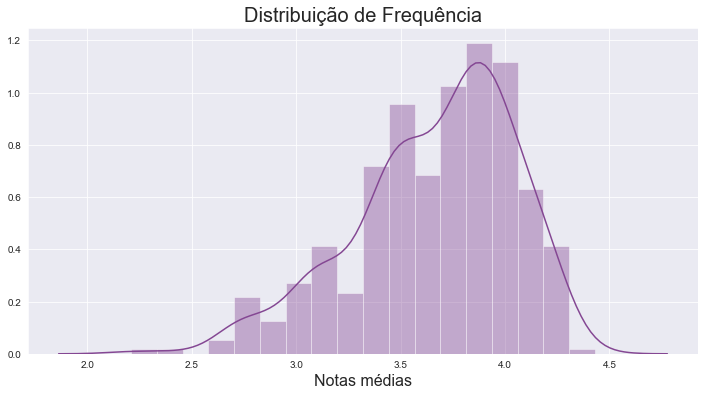

In [17]:
# solução histograma
ax = sns.distplot(filmes['nota_media'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_xlabel('Notas médias', fontsize=16)

Text(0.5, 1.0, 'Média de votos dos filmes')

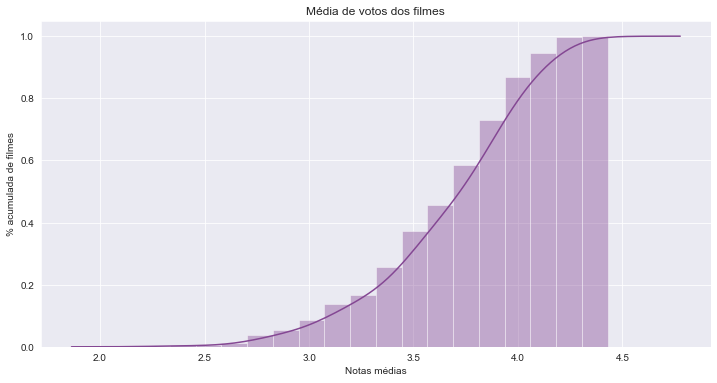

In [18]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'],
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Notas médias", ylabel="% acumulada de filmes")
ax.set_title("Média de votos dos filmes")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Votos totais')

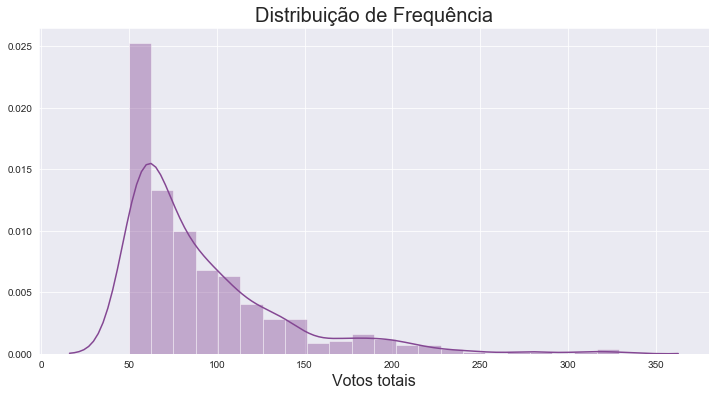

In [19]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_xlabel('Votos totais', fontsize=16)

Text(0.5, 1.0, 'Média de votos dos filmes')

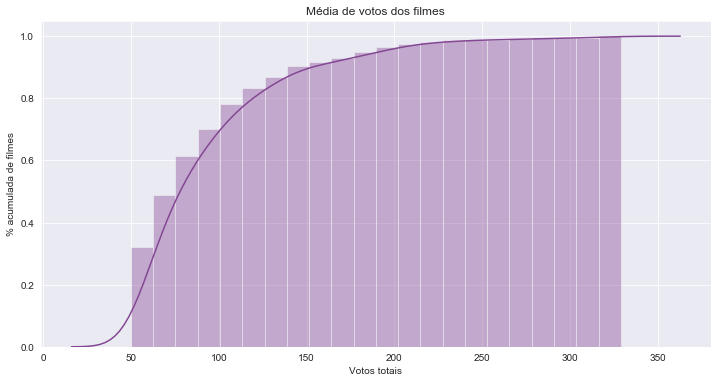

In [20]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'],
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(12,6)
ax.set(xlabel="Votos totais", ylabel="% acumulada de filmes")
ax.set_title("Média de votos dos filmes")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [21]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)

In [22]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [23]:
filmes['genres'] = filmes['genres'].str.replace('-', '')
generos = filmes['genres'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [24]:
filmes = filmes.join(generos).drop(columns=['genres'], axis=1)
filmes.head()

,movieId,title,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,3.92,215,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,3.43,110,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,3.26,52,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,6,Heat (1995),1995.0,3.95,102,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7,Sabrina (1995),1995.0,3.19,54,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Total de Filmes por gênero')

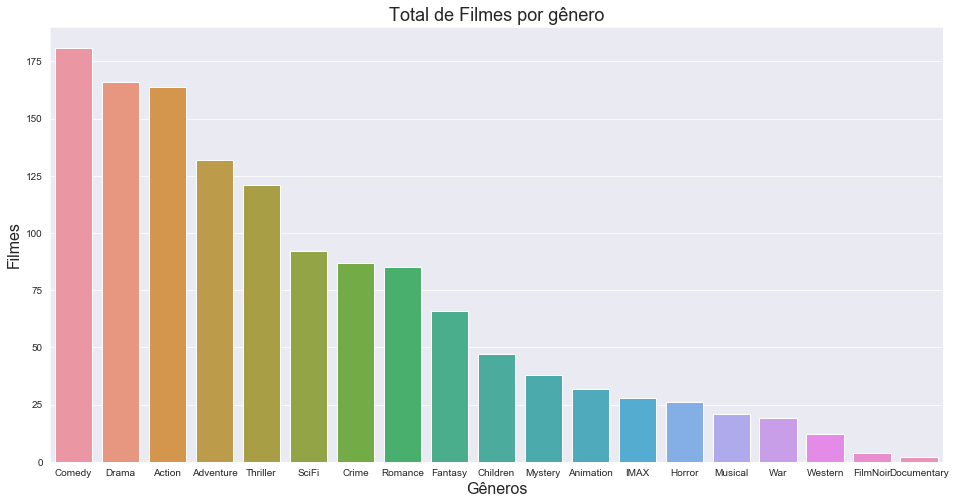

In [25]:
# solução
filmes_por_genero = generos.sum()
filmes_por_genero = filmes_por_genero.sort_values(ascending=False)

ax = sns.barplot(x=filmes_por_genero.index,y=filmes_por_genero)
ax.figure.set_size_inches(16,8)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Filmes", fontsize=16)
ax.set_title('Total de Filmes por gênero', fontsize=18)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [26]:
# solução
# eu já havia ordenado para resolver o exercício anterior
top5_generos_em_quantidade_de_filmes = filmes_por_genero[:5]

In [27]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [28]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0
5,132,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,0,0
6,0,0,0,0,70,0,0,70,0,0,0,0,0,0,70,0,0,0,0
7,0,0,0,0,0,82,0,82,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,67,0,0,0,0,0,0,67,0,0,0,0
9,0,0,0,0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# solucão
votos = votos_por_genero_por_filme.sum()
votos = votos.sort_values(ascending=False)
votos

Action         15734
Drama          15445
Comedy         15330
Adventure      13117
Thriller       11907
SciFi           8989
Crime           8649
Romance         7444
Fantasy         5993
Children        4331
Mystery         3452
Animation       3066
IMAX            2492
Horror          2215
War             2113
Musical         1822
Western          900
FilmNoir         291
Documentary      108
dtype: int64

Text(0.5, 1.0, 'Total de Votos por gênero')

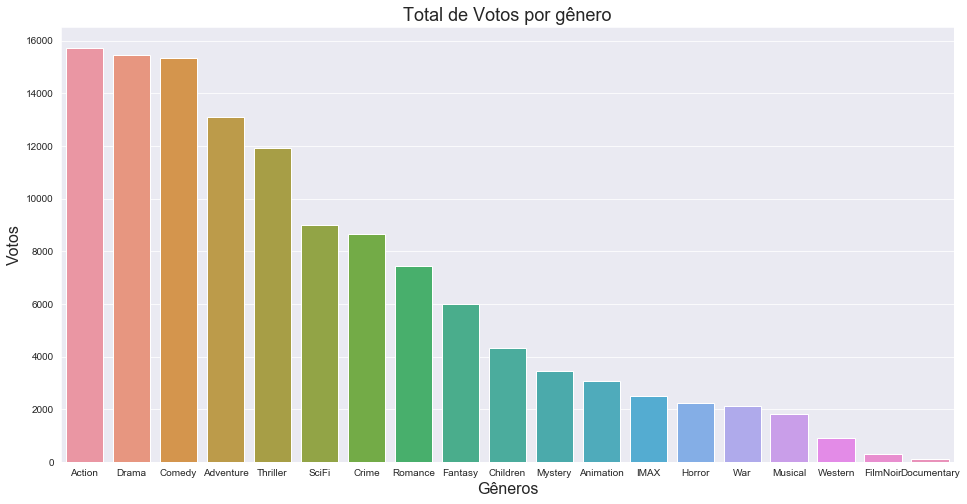

In [30]:
# solução
ax = sns.barplot(x=votos.index,y=votos)
ax.figure.set_size_inches(16,8)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Votos", fontsize=16)
ax.set_title('Total de Votos por gênero', fontsize=18)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao código
vis = (votos_por_genero_por_filme.sum() / generos.sum()).round(0)
vis = vis.sort_values(ascending=False)
vis

War            111.0
Adventure       99.0
Crime           99.0
Thriller        98.0
SciFi           98.0
Action          96.0
Animation       96.0
Drama           93.0
Children        92.0
Mystery         91.0
Fantasy         91.0
IMAX            89.0
Romance         88.0
Musical         87.0
Horror          85.0
Comedy          85.0
Western         75.0
FilmNoir        73.0
Documentary     54.0
dtype: float64

Text(0.5, 1.0, 'Média de votos por filme por gênero')

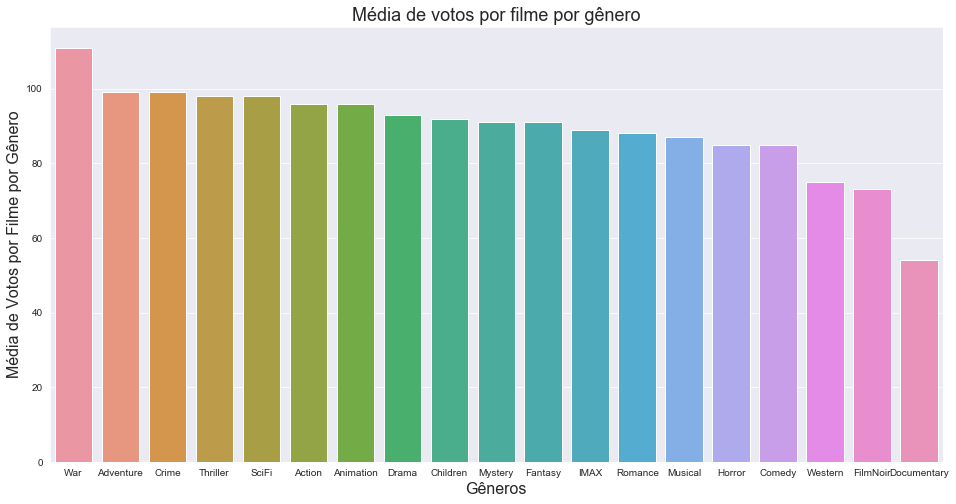

In [32]:
# solução com visualização 
ax = sns.barplot(x=vis.index,y=vis)
ax.figure.set_size_inches(16,8)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Média de Votos por Filme por Gênero", fontsize=16)
ax.set_title('Média de votos por filme por gênero', fontsize=18)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    A populariade qua calculamos agora, nada mais é que a média de votos por filme de cada genero. Como a amostra de filmes do genero 'Action' é maior que a de 'Horror', vemos a influencia que essa diferença tem na média. Apesar de ambos terem filmes bastante votados, os 'Action' tem muitos filmes com menos de 100 votos. Isso faz com que a média de votos dos filmes do genero 'Action' seja menor que a dos filmes 'Horror'. Abaixo podemos ver os histogramas destes dois generos plotados sobrepostos, ilustrando essa diferença no tamanho das amostras.
    Também podemos entender que como a amostra do genereo 'Action' é maior, a média tende a ser mais estável.

In [33]:
temp_1 = [x for x in votos_por_genero_por_filme[votos_por_genero_por_filme['Action'] > 0]['Action']]
temp_2 = [x for x in votos_por_genero_por_filme[votos_por_genero_por_filme['War'] > 0]['War']]
trace0 = go.Histogram(x=temp_1, name='Action', opacity=0.75)
trace1 = go.Histogram(x=temp_2, name='War', opacity=0.75)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', autosize=False, width=750, height=500)
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig, filename='overlaid histogram')

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

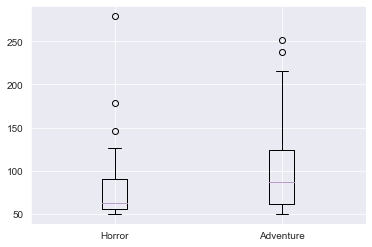

In [34]:
#Preparação e solução em matplotlib
import matplotlib.pyplot as plt

Horror_Tot_Votos = filmes[filmes['Horror'] > 0]['total_de_votos']
Adventure_Tot_Votos = filmes[filmes['Adventure'] > 0]['total_de_votos']

dados = [Horror_Tot_Votos, Adventure_Tot_Votos]
ax = plt.boxplot(x=dados, labels=['Horror', 'Adventure'])

In [35]:
# Preparação em Plotly
box1 = go.Box(y=[x for x in filmes[filmes['Horror'] > 0]['total_de_votos']], name='Horror', boxmean=True)
box2 = go.Box(y=[x for x in filmes[filmes['Adventure'] > 0]['total_de_votos']], name='Aventura', boxmean=True)

dados = [box1, box2]

In [36]:
# Solução em Plotly
layout = go.Layout(title='Boxplot - Médias dos filmes de Horror e Aventura',autosize=False, width=500, height=500)
fig = go.Figure(data=dados, layout=layout)
py.offline.iplot(fig)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

([<matplotlib.axis.XTick at 0x1eb1e908>,
 <a list of 19 Text xticklabel objects>)

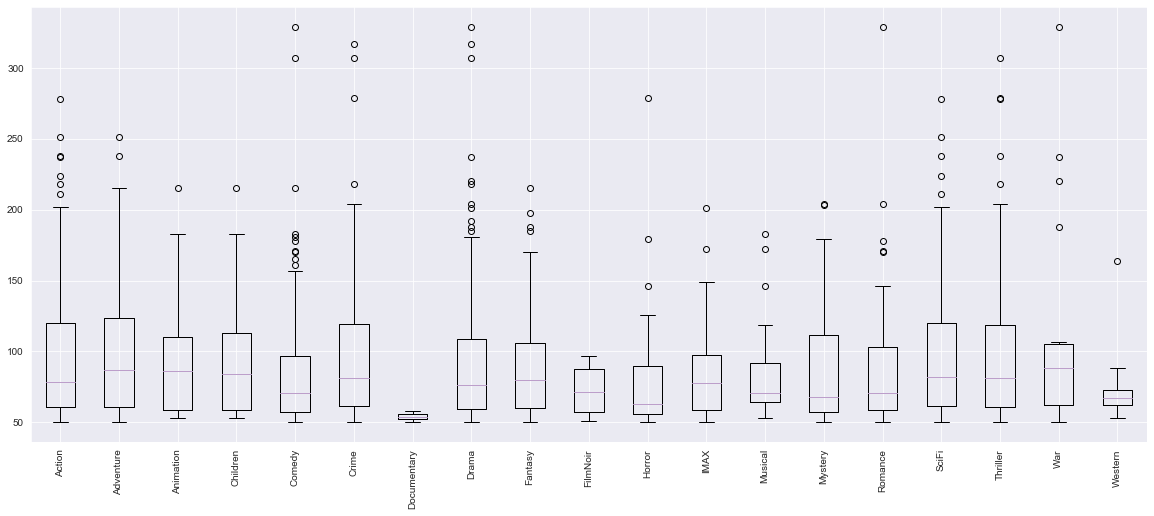

In [37]:
#Solução com o Matplotlib
plt.figure(figsize=(20, 8))
plt.boxplot(x=[filmes[filmes[x] > 0]['total_de_votos'] for x in generos.columns], labels=generos.columns)
plt.xticks([x+1 for x in range(len(generos.columns))], [x for x in generos.columns], rotation=90)

In [38]:
# Solução em plotly...
dados = [go.Box(y=[x for x in filmes[filmes[x] > 0]['total_de_votos']], name=x, boxmean=True) for x in generos.columns]

layout = go.Layout(title='Boxplot - Médias dos generos')
fig = go.Figure(data=dados, layout=layout)
py.offline.iplot(fig)

In [39]:
filmes[filmes['Horror'] > 0]['total_de_votos'].describe()

count     26.000000
mean      85.192308
std       51.073296
min       50.000000
25%       55.750000
50%       63.000000
75%       90.000000
max      279.000000
Name: total_de_votos, dtype: float64

In [40]:
filmes[filmes['Adventure'] > 0]['total_de_votos'].describe()

count    132.000000
mean      99.371212
std       47.003070
min       50.000000
25%       61.000000
50%       87.000000
75%      123.500000
max      251.000000
Name: total_de_votos, dtype: float64

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    Se supusermos que o numero de votos é porporcional ao número de expectadores, eu sugiro o genero de Aventura. Já que ele tem mais votos que o de Horror, assim como média e medianas maiores.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [41]:
#Séries sendo análisadas
serie_Total = filmes['total_de_votos']
serie_Adventure = filmes[filmes['Adventure'] > 0]['total_de_votos']
serie_Horror = filmes[filmes['Horror'] > 0]['total_de_votos']

Text(0.5, 0, 'Votos')

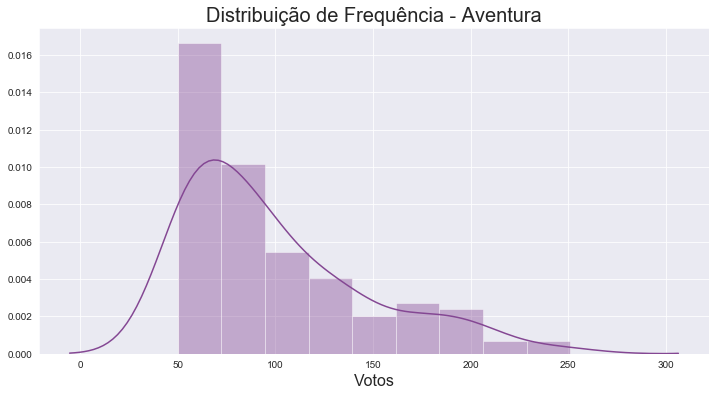

In [42]:
# solucao histograma de aventura
ax_1 = sns.distplot(serie_Adventure)
ax_1.figure.set_size_inches(12,6)
ax_1.set_title('Distribuição de Frequência - Aventura', fontsize=20)
ax_1.set_xlabel('Votos', fontsize=16)

Text(0.5, 0, 'Votos')

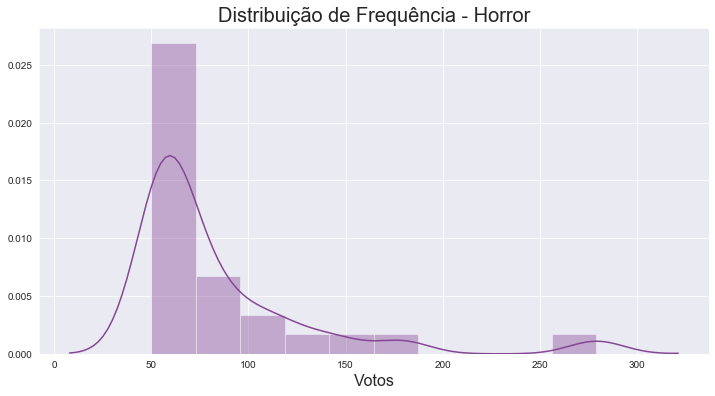

In [43]:
# solucao histograma de horror
ax_2 = sns.distplot(serie_Horror)
ax_2.figure.set_size_inches(12,6)
ax_2.set_title('Distribuição de Frequência - Horror', fontsize=20)
ax_2.set_xlabel('Votos', fontsize=16)

### <span style="color:red"> Pelos histogramas, ambas distribuições não parecem ser normais. Na realidade ambas aparentam ser assimétricas à direita. Portanto utilizarei o teste 'normaltest' para verificar normalidade das séries, e também de toda a amostra.</span>

In [44]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_value_Adventure = normaltest(serie_Adventure)
_, p_value_Horror = normaltest(serie_Horror)

print('p_value de Aventura = {}'.format(p_value_Adventure))
print('  p_value de Horror = {}'.format(p_value_Horror))

p_value de Aventura = 5.987863006199139e-06
  p_value de Horror = 1.2786148884334685e-07


### <span style="color:red"> Como todos os p_value são menores que 0,05, discartamos a hipótese nula de que essas amostras vem de uma distribuição normal. Sendo assim, é necessário utilizar um teste não-paramétrico.</span>

In [45]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(serie_Adventure, serie_Horror)
print('p_value = {}'.format(p))

p_value = 0.04782366231999856


### Solução (explique sua conclusão): <span style="color:red"> Já que p_value é menor 0.05, rejeitamoas a hipótese nula e aceitamos a hipótese alternativa. Que no caso deste teste é de que um valor de uma das amostras tende a ser maior que o da outra. No contexto do problema, se fizermos um filme de aventura é mais provável que ele tenho um número maior de votos, consequentemente mais pessoas assistiram ao filme.</span>

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

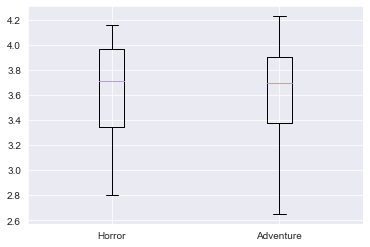

In [46]:
#Preparação e solução em matplotlib
import matplotlib.pyplot as plt

Horror_Tot_Votos = filmes[filmes['Horror'] > 0]['nota_media']
Adventure_Tot_Votos = filmes[filmes['Adventure'] > 0]['nota_media']

dados = [Horror_Tot_Votos, Adventure_Tot_Votos]
ax = plt.boxplot(x=dados, labels=['Horror', 'Adventure'])

In [47]:
# Preparação em Plotly
box1 = go.Box(y=[x for x in filmes[filmes['Horror'] > 0]['nota_media']], name='Horror', boxmean=True)
box2 = go.Box(y=[x for x in filmes[filmes['Adventure'] > 0]['nota_media']], name='Aventura', boxmean=True)

dados = [box1, box2]

In [48]:
# Solução em Plotly
layout = go.Layout(title='Boxplot - Notas médias dos filmes de Horror e Aventura',autosize=False, width=500, height=500)
fig = go.Figure(data=dados, layout=layout)
py.offline.iplot(fig)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: <span style="color:red">Recomendo os filmes de Horror, porque eles visualmente parecem ter uma chance maior de ter filmes com notas mais altas. Seus dados tem uma dispersão menor que as dos filmes de Aventura.</span>

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

In [49]:
#Séries sendo análisadas
serie_Adventure = filmes[filmes['Adventure'] > 0]['nota_media']
serie_Horror = filmes[filmes['Horror'] > 0]['nota_media']

Text(0.5, 0, 'Votos')

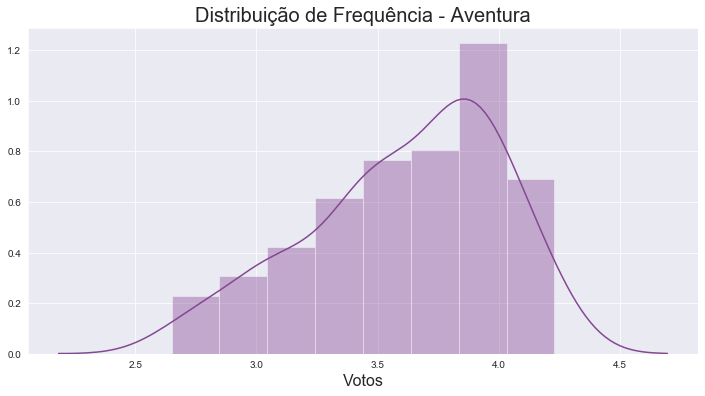

In [50]:
# solucao histograma de aventura
ax_1 = sns.distplot(serie_Adventure)
ax_1.figure.set_size_inches(12,6)
ax_1.set_title('Distribuição de Frequência - Aventura', fontsize=20)
ax_1.set_xlabel('Votos', fontsize=16)

Text(0.5, 0, 'Votos')

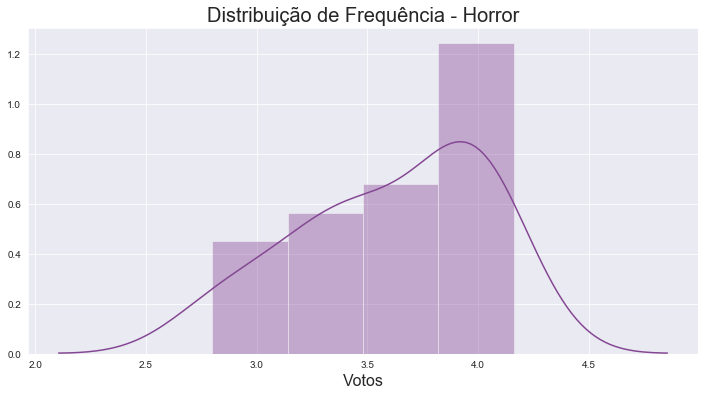

In [51]:
# solucao histograma de horror
ax_2 = sns.distplot(serie_Horror)
ax_2.figure.set_size_inches(12,6)
ax_2.set_title('Distribuição de Frequência - Horror', fontsize=20)
ax_2.set_xlabel('Votos', fontsize=16)

In [52]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p_value_Adventure = normaltest(serie_Adventure)
_, p_value_Horror = normaltest(serie_Horror)

print('p_value de Aventura = {}'.format(p_value_Adventure))
print('  p_value de Horror = {}'.format(p_value_Horror))

p_value de Aventura = 0.012923175909772433
  p_value de Horror = 0.21097715160189762


In [53]:
# solução com o teste desejado
_, p = ranksums(serie_Adventure, serie_Horror)
print('p_value = {}'.format(p))

p_value = 0.8401944736957048


### <span style="color:red">Repeti o teste do exercício anterior, e encontrei resultado diferentes. Primeiro o p_value dos filmes de Horror indica que a amostra vem de uma distribuição normal, já que é maior que 0,05. Também, o p_value da ranksums nos indica que devemos aceitar H0, indicando que ambas as amostras foram retiradas da mesma população. Sem nos deixar inferir diferenças entre as médias das notas entre as amostras.</span>
### <span style="color:red">Como essas amostras podem ter uma distribuição normal, também irei aplicar o teste t. Para verificar se posso tirar alguma conclusão. </span>

In [56]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

descr_Adventure = DescrStatsW(serie_Adventure)
descr_Horror = DescrStatsW(serie_Horror)
comparacao = descr_Adventure.get_compare(descr_Horror)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.056,0.955,-0.163,0.173


In [60]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.056,0.955,-0.163,0.173


### <span style="color:red">Com p_value de 0,955, aceitamos a hipótese nula de que as médias são iguais.</span>

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: <span style="color:red">Sim, apesar de as médias estatíscicamente não serem diferentes. Ainda recomendaria um filme de horror, por causa da distribuição. Que no caso dos filmes de Horror, parecem ter uma curva assimétrica a esquerda maior.</span>

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: <span style="color:red">Aventura, porque a chance de termos mais visualizações é maior para esse genero e não há evidencia estatística entre as notas médias dos dois generos.</span>

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [104]:
votos_por_genero = votos
votos

Action         15734
Drama          15445
Comedy         15330
Adventure      13117
Thriller       11907
SciFi           8989
Crime           8649
Romance         7444
Fantasy         5993
Children        4331
Mystery         3452
Animation       3066
IMAX            2492
Horror          2215
War             2113
Musical         1822
Western          900
FilmNoir         291
Documentary      108
dtype: int64

In [105]:
# solução: calculando os 2 generos mais votados
Top_2_Generos_Votados = votos[:2]
Top_2_Generos_Votados

Action    15734
Drama     15445
dtype: int64

In [106]:
# solução: encontrando os top 5 filmes desses generos
col_temp = ['movieId', 'title', 'ano_de_lancamento', 'nota_media', 'total_de_votos']

Top_Action = filmes[filmes['Action'] == 1][col_temp].sort_values(by='nota_media', ascending=False).head(5)
Top_Action.reset_index(drop=True, inplace=True)
Top_Drama = filmes[filmes['Drama'] == 1][col_temp].sort_values(by='nota_media', ascending=False).head(5)
Top_Drama.reset_index(drop=True, inplace=True)

print('Top Filmes de Ação\n')
print('Po   Nota   Filme\n')

for x in range(Top_Action.shape[0]):
    print('{}º - {} - {}'.format(x+1, Top_Action.iloc[x]['nota_media'], Top_Action.iloc[x]['title']))
    
print('\nTop Filmes de Drama\n')
print('Po   Nota   Filme\n')

for x in range(Top_Drama.shape[0]):
    print('{}º - {} - {}'.format(x+1, Top_Drama.iloc[x]['nota_media'], Top_Drama.iloc[x]['title']))

Top Filmes de Ação

Po   Nota   Filme

1º - 4.27 - Fight Club (1999)
2º - 4.24 - Dark Knight, The (2008)
3º - 4.23 - Star Wars: Episode IV - A New Hope (1977)
4º - 4.23 - Princess Bride, The (1987)
5º - 4.22 - Apocalypse Now (1979)

Top Filmes de Drama

Po   Nota   Filme

1º - 4.43 - Shawshank Redemption, The (1994)
2º - 4.29 - Godfather, The (1972)
3º - 4.27 - Cool Hand Luke (1967)
4º - 4.27 - Fight Club (1999)
5º - 4.26 - Godfather: Part II, The (1974)


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [140]:
# solucao
dic_maior = filmes.corr()['nota_media'][4:].abs().sort_values(ascending=False)[:2].to_dict()
dic_menor = filmes.corr()['nota_media'][4:].abs().sort_values(ascending=False)[-2:].to_dict()
print('Maiores correlações\n')

for key in dic_maior:
    dic_maior[key] = filmes.corr()['nota_media'][4:].sort_values(ascending=False).loc[key]
    print('{} - correlação = {}'.format(key, dic_maior[key]))

print('\nMenores correlações\n')

for key in dic_menor:
    dic_menor[key] = filmes.corr()['nota_media'][4:].sort_values(ascending=False).loc[key]
    print('{} - correlação = {}'.format(key, dic_menor[key]))

Maiores correlações

Drama - correlação = 0.27753686580192666
Comedy - correlação = -0.2553546475442407

Menores correlações

Musical - correlação = -0.008613004906663968
Documentary - correlação = -0.0031412112666366556


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [141]:
# solucao    
dic_maior = filmes.corr()['total_de_votos'][4:].abs().sort_values(ascending=False)[:2].to_dict()
dic_menor = filmes.corr()['total_de_votos'][4:].abs().sort_values(ascending=False)[-2:].to_dict()
print('Maiores correlações\n')

for key in dic_maior:
    dic_maior[key] = filmes.corr()['total_de_votos'][4:].sort_values(ascending=False).loc[key]
    print('{} - correlação = {}'.format(key, dic_maior[key]))

print('\nMenores correlações\n')

for key in dic_menor:
    dic_menor[key] = filmes.corr()['total_de_votos'][4:].sort_values(ascending=False).loc[key]
    print('{} - correlação = {}'.format(key, dic_menor[key]))


Maiores correlações

Comedy - correlação = -0.12852735283010133
Adventure - correlação = 0.10437956599557584

Menores correlações

Mystery - correlação = -0.007050511812665363
Children - correlação = 0.001763808342888223


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

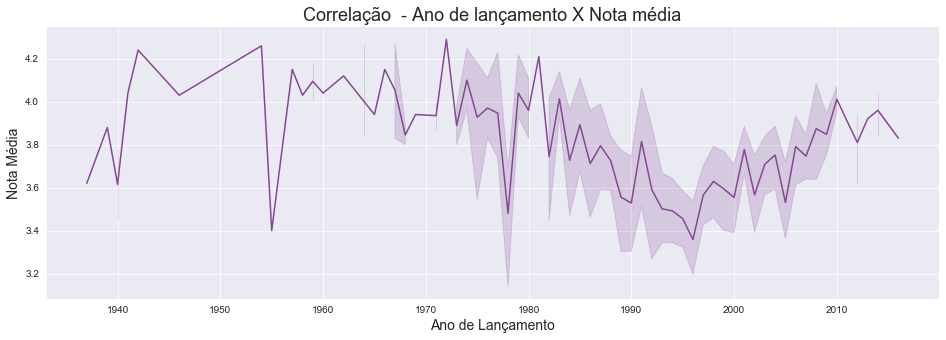

In [225]:
# solucao
fig, data = plt.subplots(figsize=(16, 5))

ax = sns.lineplot(x=filmes['ano_de_lancamento'], y=filmes['nota_media'])
ax.set_title('Correlação  - Ano de lançamento X Nota média', fontsize=18)
ax.set_xlabel('Ano de Lançamento', fontsize=14)
ax.set_ylabel('Nota Média', fontsize=14)
sns.despine()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [213]:
# solução (código)
filmes.corr()[['ano_de_lancamento', 'nota_media']].loc[['ano_de_lancamento', 'nota_media']]

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159258
nota_media,-0.159258,1.000000


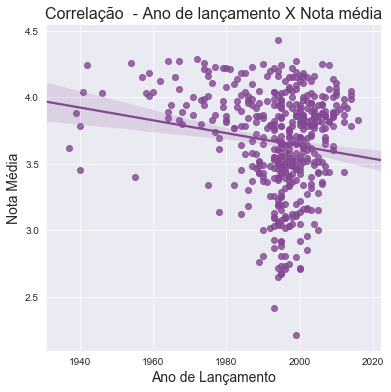

In [222]:
fig, data = plt.subplots(figsize=(6, 6))

ax = sns.regplot(x=filmes['ano_de_lancamento'], y=filmes['nota_media'])
ax.set_title('Correlação  - Ano de lançamento X Nota média', fontsize=16)
ax.set_xlabel('Ano de Lançamento', fontsize=14)
ax.set_ylabel('Nota Média', fontsize=14)
sns.despine()

### Solução (explicação) <span style="color:red">Uma das esplicações para esse formato de flecha pode ser, o aumento no número de filmes sendo feito ou pelas pessoas que votaram nessa lista. Como a internet começous a se popularizar nos meados dos anos 2000, as pessoas que fizeram as votações tendem a assistir mais filmes da sua época.</span>

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.05, 'Grade de correlação')

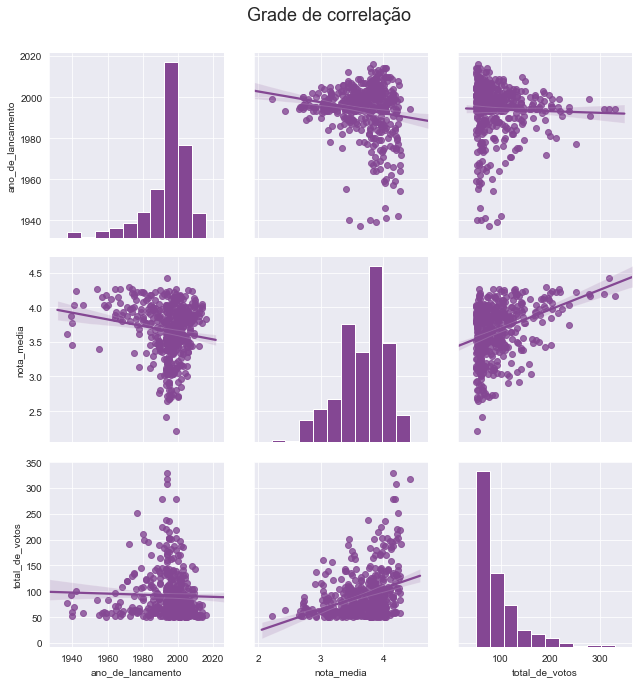

In [233]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(data=infos, kind='reg', height=3)
ax.fig.suptitle('Grade de correlação', fontsize=18, y=1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.05, 'Grade de correlação - Separados por Animação ou não')

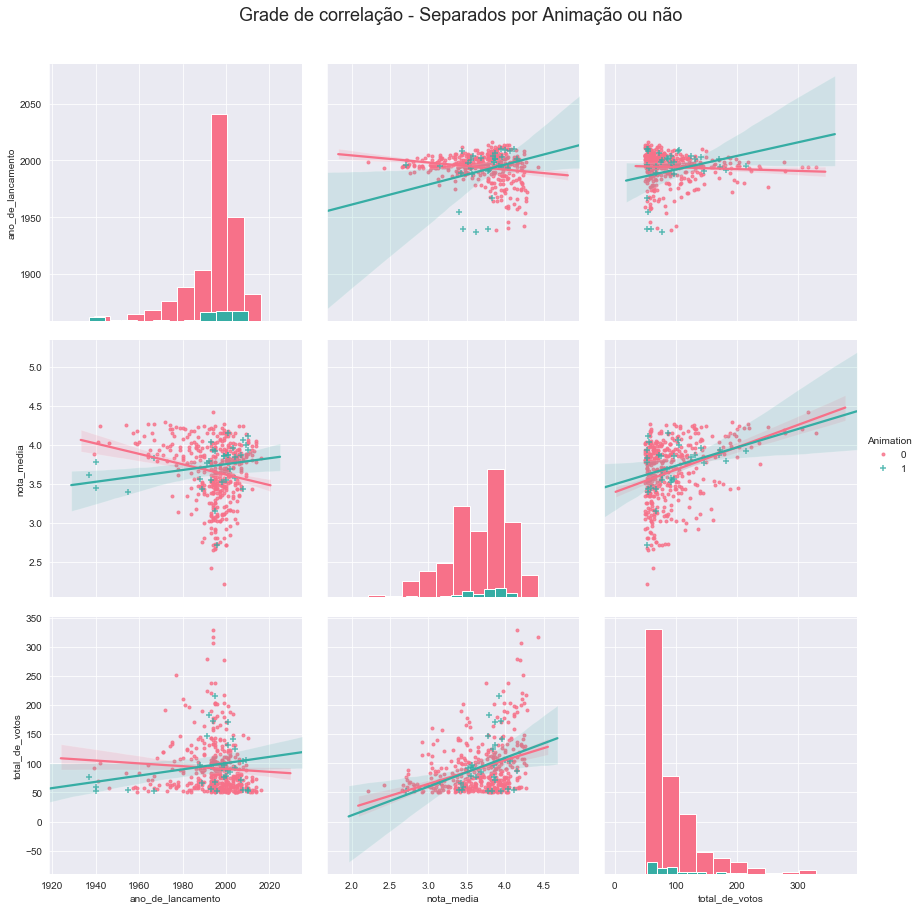

In [243]:
ax = sns.pairplot(data=filmes, vars=['ano_de_lancamento', 'nota_media', 'total_de_votos'], 
                  kind='reg', 
                  height=4, 
                  hue='Animation', 
                  palette='husl',
                  diag_kind='hist', 
                  markers=['.', '+'])

ax.fig.suptitle('Grade de correlação - Separados por Animação ou não', fontsize=18, y=1.05)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

1) Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?

2) E o `ano_de_lancamento` x `total_de_votos`?

3) E das outras categorias? Compare isso com os outros filmes.

4) O que leva você levantar como hipótese para esse resultado?

In [245]:
filmes[filmes['Animation'] == 1][['ano_de_lancamento', 'nota_media', 'total_de_votos']].corr()

,ano_de_lancamento,nota_media,total_de_votos
ano_de_lancamento,1.000000,0.257830,0.252803
nota_media,0.257830,1.000000,0.341347
total_de_votos,0.252803,0.341347,1.000000


### Solução:
### 1) <span style="color:blue">Além da quantidade de filmes aparentemente aumentar, as notas parecem ter uma tendencia positiva. As notas aparentam aumentar com o passar dos anos.</span>
### 2) <span style="color:blue">O total de votos parece ter tido um pico nos anos 90. Mas apresenta tendencia positiva.</span>
### 3) <span style="color:blue">Os filmes de animação tendem ao aumento de notas e de votos com o passar dos anos, enquanto os filmes tendem a diminuição destes fatores.</span>
### 4) <span style="color:blue">As notas médias de visulizações das animações são maiores que as da popoulação de filmes.</span>

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

#### <span style="color:blue">Acho interessante, como o dataset tem muitas categorias, mostrar alguns relacionamentos entre elas. Abaixo gerarei gráficos de Clusters, tentando relacionar alguns dos achados.</span>

## <span style="color:green">Cluster - Correlações</span>## 

<Figure size 864x864 with 0 Axes>

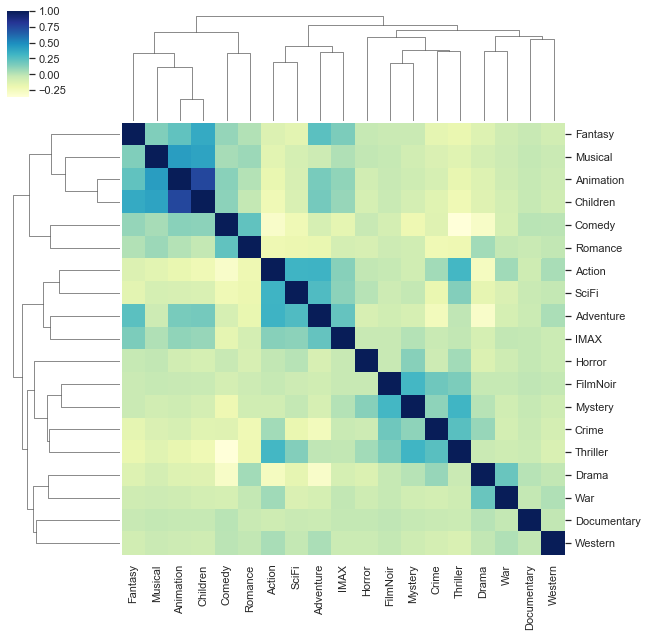

In [335]:
plt.figure(figsize=(12,12))
col = [x for x in filmes.columns[5:]]
sns.husl_palette(8, s=.45)
sns.clustermap(filmes.corr()[4:][col], cmap="YlGnBu")

#### <span style="color:blue">Achados</span> : podemos visualizar alguns grupos que apresenatam forte correlação positiva. Como os filmes de animação formam um cluster com os filmes de Criançam, e um cluster um pouco menos forte com os de Fantasia e Musicais. Também um cluster dos filmes de Ação, Scifi, Aventura e IMAX. É interessante que podemos visualizar uma forte correlação negativa entre os filmes de Comédia e Trhilers, indicando que eles podem ser categorias opostas.

## <span style="color:green">Cluster - entre as duas categorias, qual percentual tem ambas</span>## 

<Figure size 864x864 with 0 Axes>

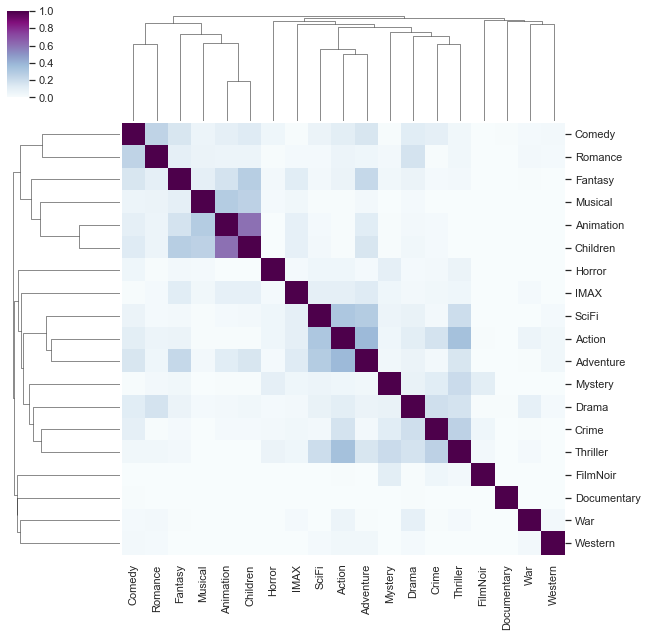

In [344]:
gen = [x for x in filmes.columns[5:]]
dic_rel = {}

for x in gen:
    dic_temp = {}
    for y in gen:
        dic_temp[y] = filmes[(filmes[x] == 1) & (filmes[y] == 1)].shape[0]/filmes[(filmes[x] == 1) | (filmes[y] == 1)].shape[0]
    dic_rel[x] = dic_temp

df_novo = pd.DataFrame(dic_rel).round(2)
plt.figure(figsize=(12,12))
sns.clustermap(df_novo, cmap="BuPu")

#### <span style="color:blue">Achados</span> : podemos destacar dois achados do cluster anterior, que se repetem aqui. Os filmes de Animação e de Crianças voltam a formar um cluster, assim como os de Ação, Aventura e Scifi. Nesse cluster foi analizado o percentual de filmes em uma amostra de filmes ou de um genero ou de outro, que eram de ambos os generos.

## <span style="color:green">Cluster - Total de votos de filmes que tem as duas categoria</span>## 

<Figure size 864x864 with 0 Axes>

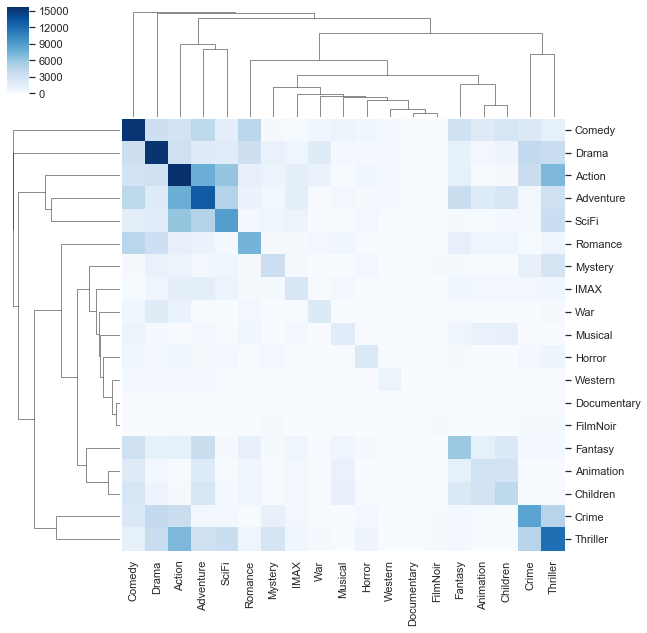

In [342]:
gen = [x for x in filmes.columns[5:]]
dic_rel = {}
for x in gen:
    
    df_temp = filmes[filmes[x] == 1]
    dic_temp = {}
    
    for y in gen:
        
        result = df_temp[df_temp[y] == 1]['total_de_votos'].sum()
        
        dic_temp[y] = result
        
    dic_rel[x] = dic_temp

df_novo = pd.DataFrame(dic_rel).round(2).fillna(0.5)
plt.figure(figsize=(12,12))
sns.clustermap(df_novo, cmap="Blues")

#### <span style="color:blue">Achados</span> : Aqui, podemos começar a responder a pergunta, 'Quais generos devo combinar para ter o maior numero de visualizações'. Já que para cada par de generos, somamos o total de votos dos filmes que eram de ambos os generos. Inicialmenete vemos que a combinações Ação+Aventura+Scifi e Crime+Thriler  tem o maior número de visualizações. E também que esses cluster tem um grau de relacionamento, já que vemos que os filmes de Ação+Trhiller também tem um alto número de visualizações.